File Name : other_specs.csv
File Directory : C:/Users/sivas/Desktop/GL/Hackathon/Hackathon_Files

Your Dataset has following shape
********************************
Rows : 25000
Columns : 43

Your Dataset contains following DataTypes
*****************************************
int64 : 1
float64 : 38
object : 4
Please Specify the Target Column

greatstone_rating


Target Column 'greatstone_rating' has Imbalanced Data

NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

1
Select below options

1.Box Plot
2.Histogram
3.Distribution

1
Total Features 38
No.of Features to Visualize

4


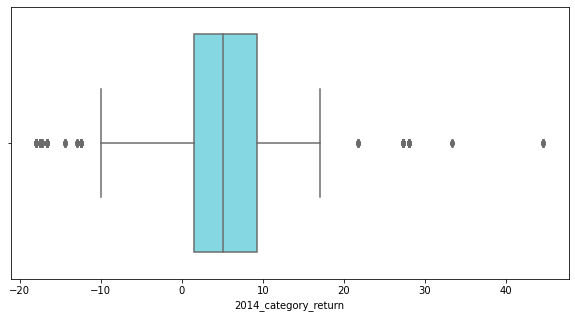

Distribution is Right Skewed

Column '2014_category_return' has 633 outliers


************************************************************************************* 



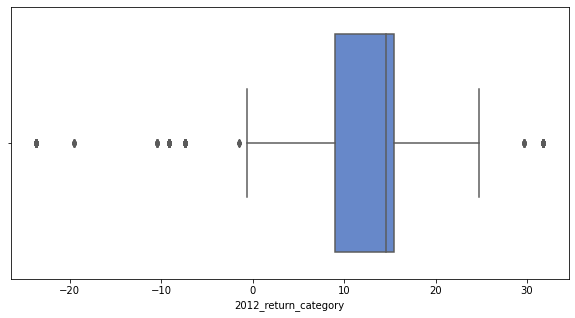

Distribution is Left Skewed

Column '2012_return_category' has 318 outliers


************************************************************************************* 



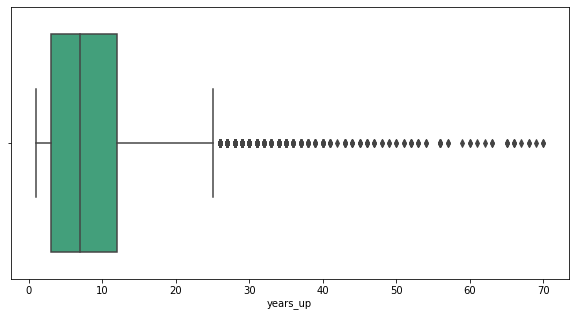

Distribution is Right Skewed

Column 'years_up' has 572 outliers


************************************************************************************* 



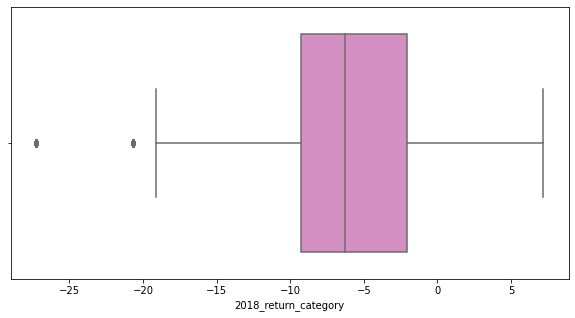

Distribution is Left Skewed

Column '2018_return_category' has 123 outliers


************************************************************************************* 

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

2
Select below options

1.Scatter Plot
2.Density Plot

1
Total Features 38
No.of Features to Visualize

2


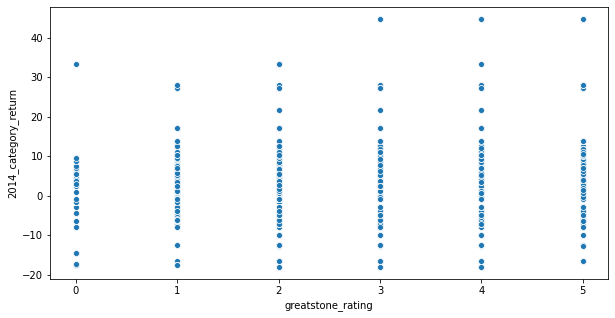

Correlation between 2014_category_return and greatstone_rating is 0.049547971228774725

*************************************************************************************


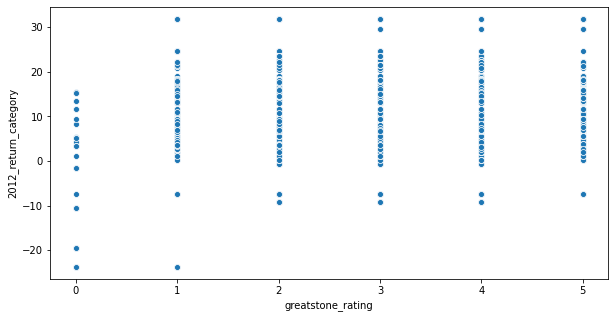

Correlation between 2012_return_category and greatstone_rating is 0.06565301543056826

*************************************************************************************
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

1
Select below options

1.Box Plot
2.Histogram
3.Distribution

2
Total Features 38
No.of Features to Visualize

3


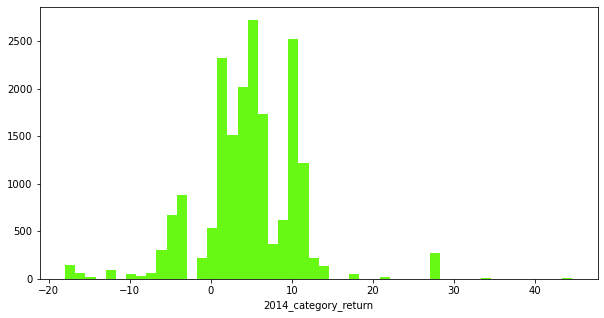

Distribution is Right Skewed

*************************************************************************************


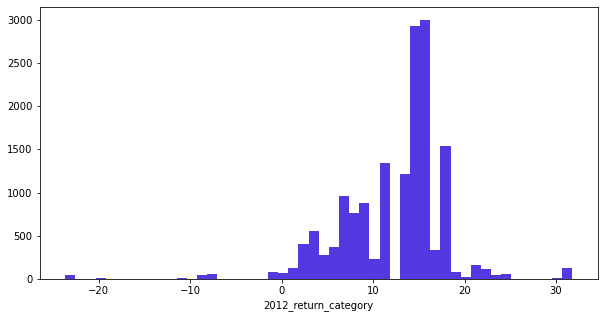

Distribution is Left Skewed

*************************************************************************************


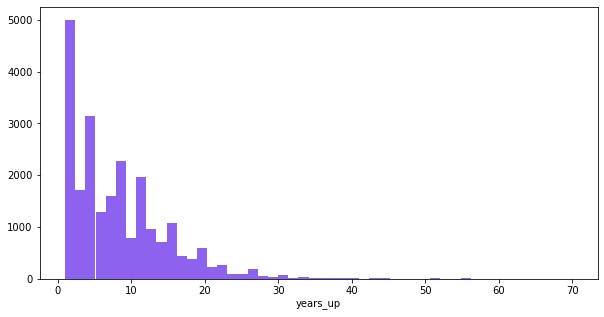

Distribution is Right Skewed

*************************************************************************************
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

1
Select below options

1.Box Plot
2.Histogram
3.Distribution

3
Total Features 38
No.of Features to Visualize

4


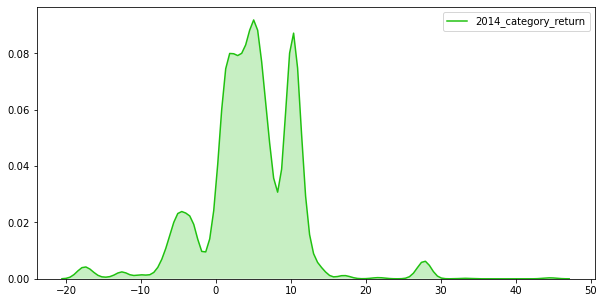

Distribution is Right Skewed

*************************************************************************************


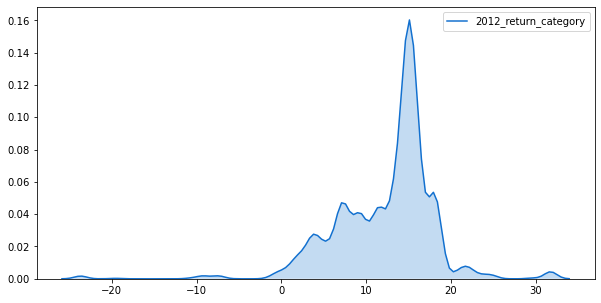

Distribution is Left Skewed

*************************************************************************************


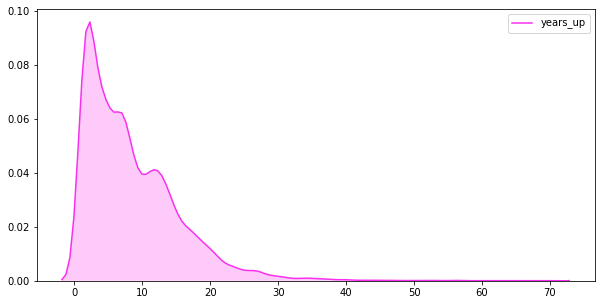

Distribution is Right Skewed

*************************************************************************************


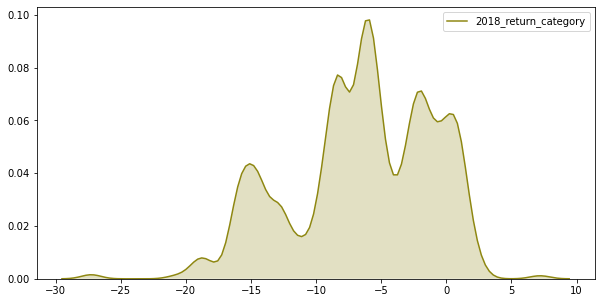

Distribution is Left Skewed

*************************************************************************************
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

2
Select below options

1.Scatter Plot
2.Density Plot

2
Total Features 38
No.of Features to Visualize

3


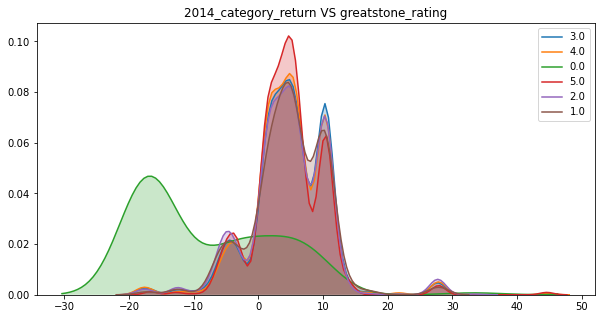

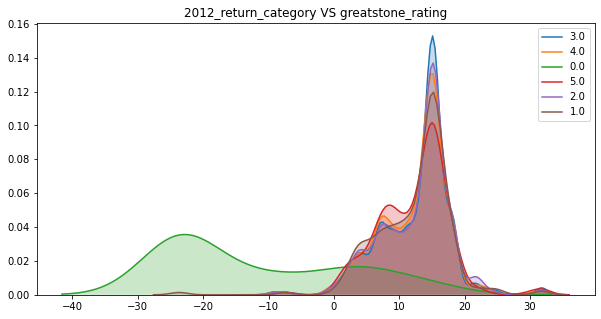

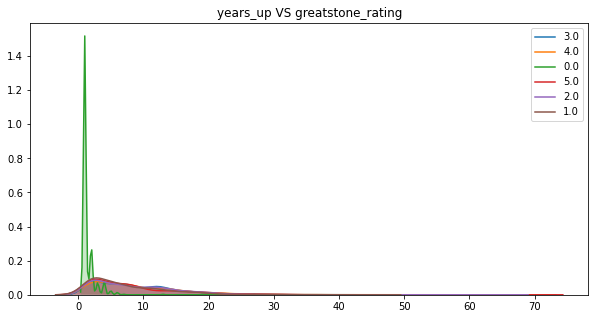

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

2
Select below options

1.Scatter Plot
2.Density Plot

1
Total Features 38
No.of Features to Visualize

1


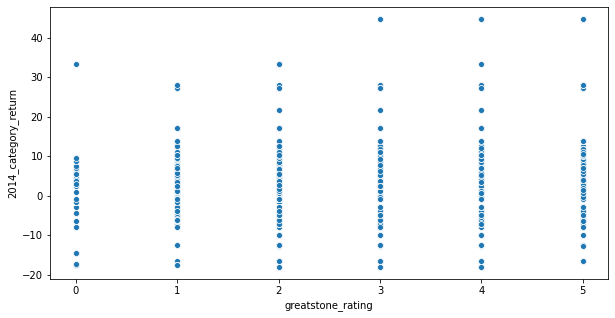

Correlation between 2014_category_return and greatstone_rating is 0.049547971228774725

*************************************************************************************
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

3
Select below options

1.Correlation Matrix
2.List of Correlated Features

1


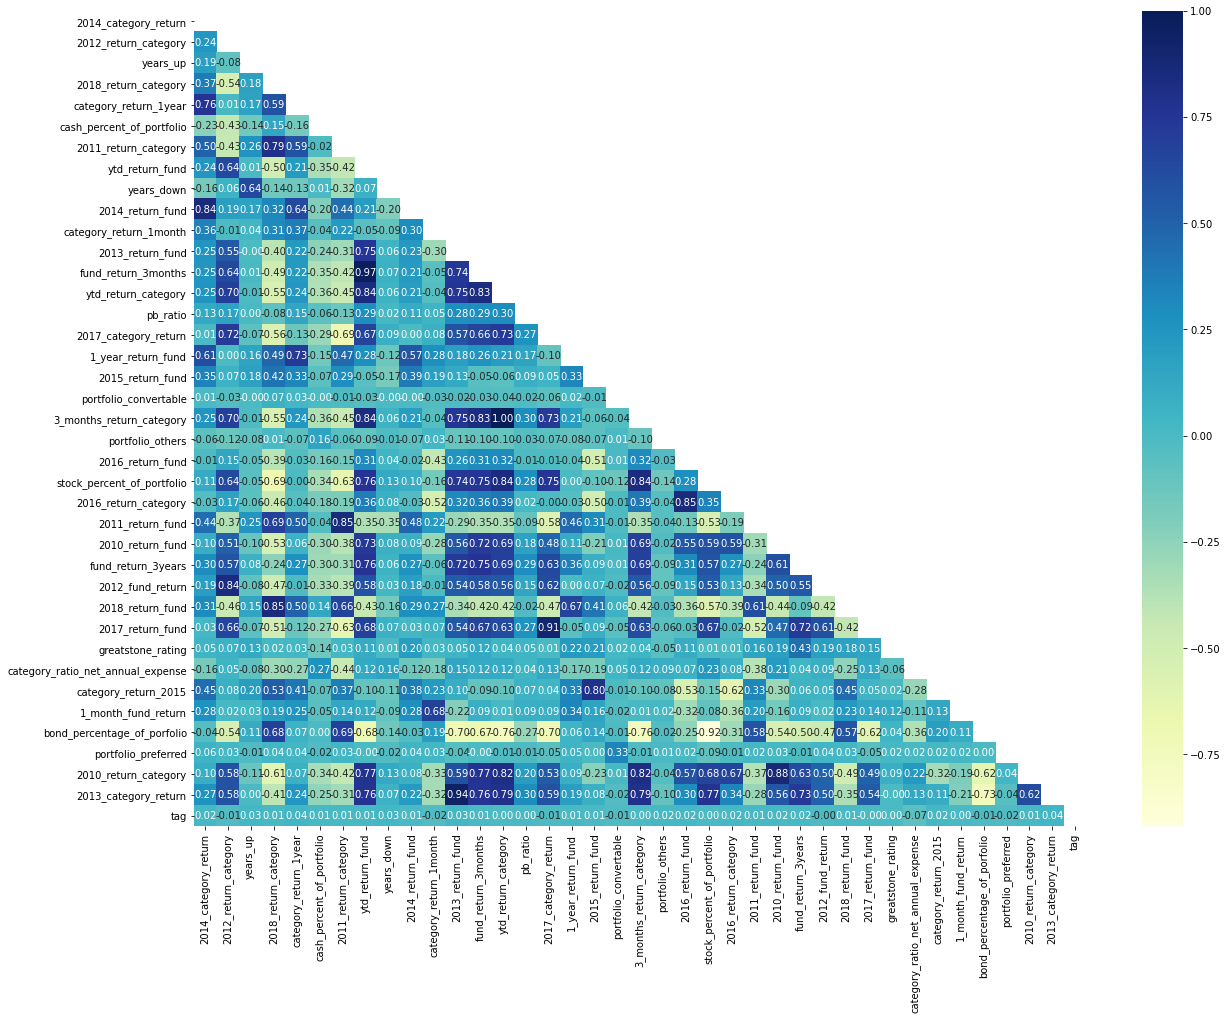

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

3
Select below options

1.Correlation Matrix
2.List of Correlated Features

2
Enter the threshold 0.9

Below 5 are/is highly correlated features

 {'fund_return_3months', 'bond_percentage_of_porfolio', '2017_return_fund', '2013_category_return', '3_months_return_category'}
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

3
Select below options

1.Correlation Matrix
2.List of Correlated Features

2
Enter the threshold 0.8

Below 12 are/is highly correlated features

 {'fund_return_3months', 'bond_percentage_of_porfolio', '2016_return_category', '2018_return_fund', '2010_return_category', '2014_return_fund', '2012_fund_return', '2017_return_fund', 'ytd_return_category', '2011_return_fund', '2013_category_return', '3_months_return_category'}
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

5
ERROR :

In [17]:
import sys

import numpy as np
import pandas as pd

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tkinter import *
from tkinter.filedialog import askopenfilename   

fname = []
# global dt_int,dt_float,dt_object
dt_int = dt_float = dt_object = []

def data_Imbalance(lst,tar_col):
    if len(set(lst)) != 1:
        print(f"Target Column '{tar_col}' has Imbalanced Data\n")
        print("NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html")

def tar_Viz(tar_col):
    count = data[tar_col].value_counts()
    
    fig = px.pie(values=count, names=count.index, title='Target Column Classes Distribution')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    fig = px.bar(data, x=count.index, y=count)
    fig.update_traces(textposition='inside')
    fig.show()
    
#     cmap = plt.get_cmap('Spectral')
#     colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

#     plt.figure(figsize=(9,9))
#     sns.set(font_scale=1.4)
#     plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
#     plt.title('Target Column Classes Distribution')
#     plt.show()
    
    tar_val =list(data[tar_col].value_counts().values)
    data_Imbalance(tar_val,tar_col)
    
def df_Info(data):
    print('Your Dataset has following shape')
    print('*'*32)
    print(f'Rows : {data.shape[0]}\nColumns : {data.shape[1]}\n')
    
def df_Dtypes(data):
    
    global dt_int,dt_float,dt_object
#     dt_int = dt_float = dt_object = []
    g = data.columns.to_series().groupby(data.dtypes).groups
    print('Your Dataset contains following DataTypes')
    print('*'*41)
    for k, v in g.items():
        print(f"{k.name} : {len(v)}")
        
    for k, v in g.items():
#     print(f"{k.name} : {(v)}")
        if k.name == 'int64':
            dt_int = list(v)

        elif k.name == 'float64':
            dt_float = list(v)

        elif k.name == 'object':
            dt_object = list(v)

def no_of_Features(func):
    print(f'Total Features {len(dt_float)}')
    No_of_Feat = int(input('No.of Features to Visualize\n\n'))
    if No_of_Feat <= len(dt_float) :
        func(no_of_col = No_of_Feat)
    else :
        print(f'ERROR : No.of columns should be <= {len(dt_float)}')

def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(f"\nBelow {len(col_corr)} are/is highly correlated features\n\n",col_corr)
    
def correlation_Matrix():
    plt.figure(figsize=(20,15))
    matrix = np.triu(data[dt_float + dt_int].corr())
    sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
    plt.show()

def scatter_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=tar_col, y=col, data=data)
#         plt.title(f"{col} VS {tar_col}")
        plt.show()
        
        cor = data[col].corr(data[tar_col])
        print(f'Correlation between {col} and {tar_col} is {cor}\n')
        print('*'*85)
    

def density_Plot(no_of_col = len(dt_float)):
    for i, col in enumerate(dt_float[:no_of_col]):
        plt.figure(figsize=(10,5))
        for i in list(data[tar_col].unique()):
            sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
        plt.title(f"{col} VS {tar_col}")
        plt.show() 
    
def outlier_Treatment(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers\n\n")

def skewness_(df,col):
    skewness = df[col].skew()
    if skewness > 0:
        print('Distribution is Right Skewed\n')
    elif skewness < 0:
        print('Distribution is Left Skewed\n')
    else:
        print('Normally Distributed\n')
        
def box_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
#         if len(outliers) != 0:
#             print(f"Index of outlier records : {list(outliers.index)}")
        print('*'*85,'\n')
    
def histogram(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
                     ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)        
        
        
def distribution(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
        plt.show()
        
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)            
            
def openFile():
    global fname
    fname = askopenfilename()
    root.destroy()

if __name__ == '__main__':

    root = Tk()
    Button(root, text='File Open', command = openFile).pack(fill=X)
    mainloop()

    if fname == []:
        print("No FIle has selected")
    else:
        file_path = fname.rsplit('/',maxsplit=1)
        df = file_path[1]
        print(f"File Name : {df}")
        print(f"File Directory : {file_path[0]}\n")
        try:
            data = pd.read_csv(fname)
            df_Info(data)
            df_Dtypes(data)
            try :
                tar_col = input('Please Specify the Target Column\n\n')
                tar_Viz(tar_col)
                while True:    
                    try :
                        input_value = int(input('Select below options\n\n1.Univariate Analysis\n2.Bivariate Analysis\n3.Multivariate Analysis\n4.Quit\n\n'))
                        if input_value == 1:
                            input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
                            if input_value1 == 1:
                                no_of_Features(box_Plot)
                            elif input_value1 == 2:
                                no_of_Features(histogram)
                            elif input_value1 == 3:
                                no_of_Features(distribution)
                            else :
                                print('ERROR : Please enter in range value')

                        elif input_value == 2:
                            input_value1 = int(input('Select below options\n\n1.Scatter Plot\n2.Density Plot\n\n'))
                            if input_value1 == 1:
                                no_of_Features(scatter_Plot)
                            elif input_value1 == 2:
                                no_of_Features(density_Plot)
                            else :
                                print('ERROR : Please enter in range value')
                        elif input_value == 3:
                            input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
                            if input_value1 == 1:
                                correlation_Matrix()
                            elif input_value1 == 2:
                                thresh = float(input('Enter the threshold '))
                                correlation(data,thresh)
                            else :
                                print('ERROR : Please enter in range value')
                        elif input_value == 4 :
                            print('\nThank You, Bye.\n')
                            break
                        else:
                            print('ERROR : Please enter in range value')
                    except ValueError :
                        print('ERROR : only INTEGERS are acceptable')
            except KeyError:
                print('ERROR : Either you passed the WRONG column (or) other than a STRING ')
        except Exception as e:
                print('ERROR : File Format is not supported',e)

In [ ]:
greatstone_rating
diagnosis

In [ ]:
greatstone_rating

In [ ]:
data = pd.read_csv(fname)
data.head()

In [ ]:
dt_int

In [ ]:
def no_of_Features(func):
    print(f'Total Features {len(dt_float)}')
    No_of_Feat = int(input('No.of Features to Visualize\n\n'))
    if No_of_Feat <= len(dt_float) :
        func(no_of_col = No_of_Feat)
    else :
        print(f'ERROR : No.of columns should be <= {len(dt_float)}')

def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(col_corr)
    
def correlation_Matrix():
    plt.figure(figsize=(20,15))
    matrix = np.triu(data[dt_float + dt_int].corr())
    sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
    plt.show()

def scatter_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=tar_col, y=col, data=data)
#         plt.title(f"{col} VS {tar_col}")
        plt.show()
        
        cor = data[col].corr(data[tar_col])
        print(f'Correlation between {col} and {tar_col} is {cor}\n')
        print('*'*85)
    

def density_Plot(no_of_col = len(dt_float)):
    for i, col in enumerate(dt_float[:no_of_col]):
        plt.figure(figsize=(10,5))
        for i in list(data[tar_col].unique()):
            sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
        plt.title(f"{col} VS {tar_col}")
        plt.show() 
    
def outlier_Treatment(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers\n\n")

def skewness_(df,col):
    skewness = df[col].skew()
    if skewness > 0:
        print('Distribution is Right Skewed\n')
    elif skewness < 0:
        print('Distribution is Left Skewed\n')
    else:
        print('Normally Distributed\n')
        
def box_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
#         if len(outliers) != 0:
#             print(f"Index of outlier records : {list(outliers.index)}")
        print('*'*85,'\n')
    
def histogram(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
                     ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)        
        
        
def distribution(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
        print('*'*85)
# var = 1
while True:
    try :
        input_value = int(input('Select below options\n\n1.Univariate Analysis\n2.Bivariate Analysis\n3.Multivariate Analysis\n4.Quit\n\n'))
        if input_value == 1:
    #         print('Univariate')
            input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
            if input_value1 == 1:
                no_of_Features(box_Plot)
            elif input_value1 == 2:
                no_of_Features(histogram)
            elif input_value1 == 3:
                no_of_Features(distribution)
            elif input_value1 == 4 :
                break
            else :
                print('ERROR : Please enter in range value')

        elif input_value == 2:
            print('Bivariate')

            input_value1 = int(input('Select below options\n\n1.Scatter Plot\n2.Density Plot\n\n'))
            if input_value1 == 1:
                no_of_Features(scatter_Plot)
            elif input_value1 == 2:
                no_of_Features(density_Plot)
            else :
                print('ERROR : Please enter in range value')
        elif input_value == 3:
            input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
            if input_value1 == 1:
                correlation_Matrix()
            elif input_value1 == 2:
                correlation(data)
            else :
                print('ERROR : Please enter in range value')
    #         print('Multivariate')
        elif input_value == 4 :
            break
        else:
            print('ERROR : Please enter in range value')
    except ValueError :
        print('ERROR : only INTEGERS are acceptable')

In [ ]:
tar_col

In [ ]:
# plt.figure(figsize=(20,15))
# matrix = np.triu(data[dt_float + dt_int].corr())
# sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
# plt.show()
def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(f"Below {len(col_corr)} are highly correlated features\n\n",col_corr)
correlation(data,0.99)

In [ ]:
# sns.scatterplot(x="greatstone_rating", y="2012_return_category", data=data)
# data.columns

In [ ]:
for i, col in enumerate(iris.columns[:1]):
    plt.figure(figsize=(10,5))
    for i in list(iris.species.unique()):
        sns.kdeplot(iris.loc[iris['species'] == i, col], shade=True, label=i)
    plt.title(f"{col} Vs species")
#     plt.legend().remove()
    plt.show()    

In [ ]:
df = iris[['species','sepal_length']].groupby(['species']).agg({'sepal_length':['min', 'max']})#.columns.droplevel()

In [ ]:
df.columns = df.columns.droplevel()

In [ ]:
df

In [ ]:
if df.iloc[0,0]

In [ ]:
iris.sepal_length

In [ ]:
count = data[tar_col].value_counts(dropna=True)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

plt.figure(figsize=(9,9))
sns.set(font_scale=1.4)
plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
plt.title('Target Column Classes Distribution')
plt.show()

# sns.barplot( x=count.index, y=count, data=data, palette='Spectral')
# plt.show()

In [ ]:
# n = len(dt_float)
n = 5
for col in dt_float[:n]:
    print(col)
# print(n)

In [ ]:
def box_Plot(col):
# for col in dt_int:
    sns.boxplot(x=data[col])
    print('\n')
    sorted(data[col])
    Q1,Q3 = np.percentile(data[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(IQR,lower_range,upper_range)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers")
    if len(outliers) != 0:
        print(f"Index of outlier records : {list(outliers.index)}")

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['2014_category_return'],kde=False,hist_kws={"linewidth": 3,"alpha": 1}) 

# skewness = data['years_up'].skew()
# if skewness > 0:
#     print('Distribution is Right Skewed')
# elif skewness < 0:
#     print('Distribution is Left Skewed')
# else:
#     print('Normally Distributed')

# sns.kdeplot(data['years_up'], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));


In [ ]:
data['2014_category_return']

In [ ]:
import numpy as np
box_Plot('years_up')

In [ ]:
import pandas as pd
d = pd.DataFrame({'A':[1,2,5,19,1,5,3],'B':[10,10,10,1000,1,5,3],'C':[1,0,1,0,1,5,3]})

In [ ]:
d.info()

In [ ]:
import seaborn as sns
# plt.figure(figsize=(8,5))
# sns.boxplot(x=data['ytd_return_category'])

# fig = px.box(data, y="ytd_return_category")
# fig.show()

In [ ]:
def outlier_treatment(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(lower_range,upper_range)
    outliers = df[col][(df[col] < lower_range) | (df[col] > upper_range)]
    print(f"Column {col} has {len(outliers)} outliers")
#     print(f"Index of outlier records : {list(outliers.index)}")

In [ ]:
outlier_treatment(data,'2014_category_return')

In [ ]:
# import sys

# import numpy as np
# import pandas as pd

# import plotly.express as px

# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# from tkinter import *
# from tkinter.filedialog import askopenfilename   

# fname = []
# # global dt_int,dt_float,dt_object
# dt_int = dt_float = dt_object = []

# def data_Imbalance(lst,tar_col):
#     if len(set(lst)) != 1:
#         print(f"Target Column '{tar_col}' has Imbalanced Data\n")
#         print("NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html")

# def tar_Viz(tar_col):
#     count = data[tar_col].value_counts()
    
#     fig = px.pie(values=count, names=count.index, title='Target Column Classes Distribution')
#     fig.update_traces(textposition='inside', textinfo='percent+label')
#     fig.show()

#     fig = px.bar(data, x=count.index, y=count)
#     fig.update_traces(textposition='inside')
#     fig.show()
    
# #     cmap = plt.get_cmap('Spectral')
# #     colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

# #     plt.figure(figsize=(9,9))
# #     sns.set(font_scale=1.4)
# #     plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
# #     plt.title('Target Column Classes Distribution')
# #     plt.show()
    
#     tar_val =list(data[tar_col].value_counts().values)
#     data_Imbalance(tar_val,tar_col)
    
# def df_Info(data):
#     print('Your Dataset has following shape')
#     print('*'*32)
#     print(f'Rows : {data.shape[0]}\nColumns : {data.shape[1]}\n')
    
# def df_Dtypes(data):
    
#     global dt_int,dt_float,dt_object
# #     dt_int = dt_float = dt_object = []
#     g = data.columns.to_series().groupby(data.dtypes).groups
#     print('Your Dataset contains following DataTypes')
#     print('*'*41)
#     for k, v in g.items():
#         print(f"{k.name} : {len(v)}")
        
#     for k, v in g.items():
# #     print(f"{k.name} : {(v)}")
#         if k.name == 'int64':
#             dt_int = list(v)

#         elif k.name == 'float64':
#             dt_float = list(v)

#         elif k.name == 'object':
#             dt_object = list(v)

# def no_of_Features(func):
#     print(f'Total Features {len(dt_float)}')
#     No_of_Feat = int(input('No.of Features to Visualize\n\n'))
#     if No_of_Feat <= len(dt_float) :
#         func(no_of_col = No_of_Feat)
#     else :
#         print(f'ERROR : No.of columns should be <= {len(dt_float)}')

# def correlation(dataset,threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#     print(f"\nBelow {len(col_corr)} are/is highly correlated features\n\n",col_corr)
    
# def correlation_Matrix():
#     plt.figure(figsize=(20,15))
#     matrix = np.triu(data[dt_float + dt_int].corr())
#     sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
#     plt.show()

# def scatter_Plot(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.scatterplot(x=tar_col, y=col, data=data)
# #         plt.title(f"{col} VS {tar_col}")
#         plt.show()
        
#         cor = data[col].corr(data[tar_col])
#         print(f'Correlation between {col} and {tar_col} is {cor}\n')
#         print('*'*85)
    

# def density_Plot(no_of_col = len(dt_float)):
#     for i, col in enumerate(dt_float[:no_of_col]):
#         plt.figure(figsize=(10,5))
#         for i in list(data[tar_col].unique()):
#             sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
#         plt.title(f"{col} VS {tar_col}")
#         plt.show() 
    
# def outlier_Treatment(data,col):
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
#     print(f"Column '{col}' has {len(outliers)} outliers\n\n")

# def skewness_(df,col):
#     skewness = df[col].skew()
#     if skewness > 0:
#         print('Distribution is Right Skewed\n')
#     elif skewness < 0:
#         print('Distribution is Left Skewed\n')
#     else:
#         print('Normally Distributed\n')
        
# def box_Plot(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         plt.show()
        
#         skewness_(data,col)
#         outlier_Treatment(data,col)
# #         if len(outliers) != 0:
# #             print(f"Index of outlier records : {list(outliers.index)}")
#         print('*'*85,'\n')
    
# def histogram(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
#                      ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         plt.show()
#         skewness_(data,col)
# #         outlier_Treatment(data,col)
#         print('*'*85)        
        
        
# def distribution(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
# #         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
#         plt.show()
        
#         skewness_(data,col)
# #         outlier_Treatment(data,col)
#         print('*'*85)            
            
# def openFile():
#     global fname
#     fname = askopenfilename()
#     root.destroy()

# if __name__ == '__main__':

#     root = Tk()
#     Button(root, text='File Open', command = openFile).pack(fill=X)
#     mainloop()

#     if fname == []:
#         print("No FIle has selected")
#     else:
#         file_path = fname.rsplit('/',maxsplit=1)
#         df = file_path[1]
#         print(f"File Name : {df}")
#         print(f"File Directory : {file_path[0]}\n")
#         try:
#             data = pd.read_csv(fname)
#             df_Info(data)
#             df_Dtypes(data)
#             try :
#                 tar_col = input('Please Specify the Target Column\n\n')
#                 tar_Viz(tar_col)
#                 while True:    
#                     try :
#                         input_value = int(input('Select below options\n\n1.Univariate Analysis\n2.Bivariate Analysis\n3.Multivariate Analysis\n4.Quit\n\n'))
#                         if input_value == 1:
#                             input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
#                             if input_value1 == 1:
#                                 no_of_Features(box_Plot)
#                             elif input_value1 == 2:
#                                 no_of_Features(histogram)
#                             elif input_value1 == 3:
#                                 no_of_Features(distribution)
#                             else :
#                                 print('ERROR : Please enter in range value')

#                         elif input_value == 2:
#                             input_value1 = int(input('Select below options\n\n1.Scatter Plot\n2.Density Plot\n\n'))
#                             if input_value1 == 1:
#                                 no_of_Features(scatter_Plot)
#                             elif input_value1 == 2:
#                                 no_of_Features(density_Plot)
#                             else :
#                                 print('ERROR : Please enter in range value')
#                         elif input_value == 3:
#                             input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
#                             if input_value1 == 1:
#                                 correlation_Matrix()
#                             elif input_value1 == 2:
#                                 thresh = float(input('Enter the threshold '))
#                                 correlation(data,thresh)
#                             else :
#                                 print('ERROR : Please enter in range value')
#                         elif input_value == 4 :
#                             print('\nThank You, Bye.\n')
#                             break
#                         else:
#                             print('ERROR : Please enter in range value')
#                     except ValueError :
#                         print('ERROR : only INTEGERS are acceptable')
#             except KeyError:
#                 print('ERROR : Either you passed the WRONG column (or) other than a STRING ')
#         except Exception as e:
#                 print('ERROR : File Format is not supported',e)